Here we are going to display some basic functionality of the pychometrics package.

First, lets simulate some data. We are going to have 100 people and 50 items.



In [8]:
from psychometrics.simulation import simulate_items, simulate_people, item_vectors
from psychometrics.CTT import examinee_score
from psychometrics.test_info import test_descriptives
import pandas as pd

items = simulate_items()
people = simulate_people(100, {'mean': 0, 'sd': 1})
prob_vector, response_vector = item_vectors(items, people)


print('Here are the item parameters')
print(pd.DataFrame(items))

print('Here is the Responses')
print(response_vector.head())

print('Here is the Probabilities')
print(prob_vector.head())

rater
1    138
2    151
3    135
Name: time, dtype: int64
Here are the item parameters
    a         b     c
0   1  0.441401  None
1   1 -1.035885  None
2   1 -0.204619  None
3   1 -0.872237  None
4   1  0.784354  None
5   1  0.035849  None
6   1  0.029624  None
7   1  1.480677  None
8   1  0.518500  None
9   1  1.127700  None
10  1  0.913717  None
11  1  0.737153  None
12  1  1.022070  None
13  1  0.220178  None
14  1 -0.378137  None
15  1 -0.586206  None
16  1  0.058080  None
17  1 -0.024982  None
18  1  0.447714  None
19  1 -0.246391  None
20  1  2.865526  None
21  1  0.278379  None
22  1  0.468242  None
23  1 -0.322427  None
24  1  2.234657  None
25  1  0.067535  None
26  1 -0.277549  None
27  1  0.790175  None
28  1 -1.667511  None
29  1  0.198506  None
30  1  0.740239  None
31  1  1.165761  None
32  1 -0.976425  None
33  1 -0.140166  None
34  1 -0.553470  None
35  1 -0.419098  None
36  1  0.158775  None
37  1  0.056222  None
38  1  0.673886  None
39  1 -1.062277  None
40  1 -0.51

Now lets compute some basic Classical Test Theory item Statistics

Reliability
P-value
Point Biserial
Reliability without the item

In [9]:
from psychometrics.item_analysis import get_p_values, discrimination_index, alpha_without_item

p_values = get_p_values(response_vector)
point_biserial, biserial = discrimination_index(response_vector)
reliability_wo_item = alpha_without_item(response_vector)

print("P Values")
print(p_values.head(5))

print("point biserial")
print(biserial.head(5))

print("biserial")
print(point_biserial.head(5))

print('alpha without item')
print(reliability_wo_item.head())


3.092081723977407
item_id
1    3.041667
2    3.000000
3    3.333333
4    2.916667
5    3.041667
6    2.666667
Name: latency, dtype: float64


AttributeError: 'Series' object has no attribute 'ix'

A look at Reliability

Alpha
split half
Standard error of measurement


In [ ]:
from psychometrics.reliability import calculate_alpha,calculate_split_half, calculate_sem
print(response_vector)
alpha = calculate_alpha(response_vector)
split_half = calculate_split_half(response_vector)
sem = calculate_sem(response_vector)
print("Alpha is ", alpha)
print("Split half is ", split_half) #todo: Fix this!
print('The SEM is: ', sem)

Lets grab some basic test information!

In [ ]:
from psychometrics.test_info import test_descriptives

descriptives_dict = test_descriptives(response_vector)

print(descriptives_dict)



Lets try out some IRT. We currently only have the 2pl model working.


In [ ]:
from psy import Irt
import time
items = simulate_items()
people = simulate_people(10000, {'mean': 0, 'sd': 1})
prob_vector, response_vector = item_vectors(items, people)

model = Irt(scores=response_vector.values, link='logit', params_type='2PL')
res = model.fit()
print(res)

print("Compare these values to the simulated values:")

print(items)


And some Graphics. lets graph the first item.

In [ ]:
from psychometrics.IRT import plot_irt

plot_irt(1,discrimination=2, guessing=.25)



Lets move to standard setting. Lets look at the Angoff, Contrasting groups and IIT methods


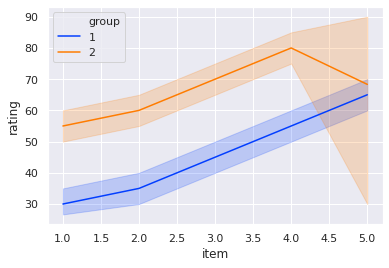

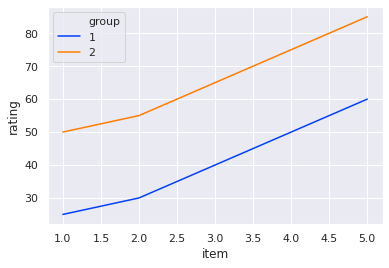

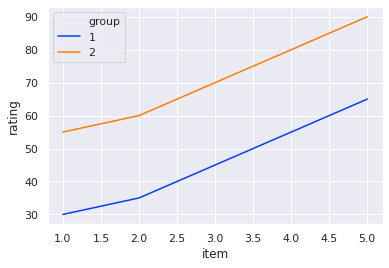

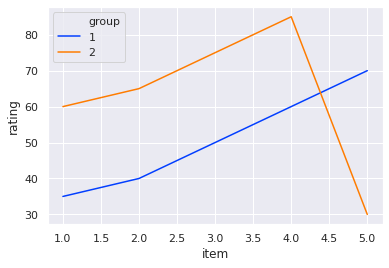

                       sum_sq    df         F    PR(>F)
C(group)          3203.333333   1.0  24.02500  0.000086
C(item)           3013.333333   4.0   5.65000  0.003280
C(group):C(item)   563.333333   4.0   1.05625  0.403698
Residual          2666.666667  20.0       NaN       NaN
  Unnamed: 0  rater1  rater2  rater3  rater4
0      item1      25      35      45      55
1      item2       5      94      20      92
2      item3      33       6      34      57
3      item4       4      93      54      20
4      item5      30      78       1      80
5      item6      50      44      52      49
6      item7      91      84      49      24
7      item8      30      91       2      88
8      item9      85      66      84      24
9     item10      55       5      99      29
{'suggested_cut': 49.05, 'sem_rater_average': 3.063404061570142}


AttributeError: 'DataFrame' object has no attribute 'show'

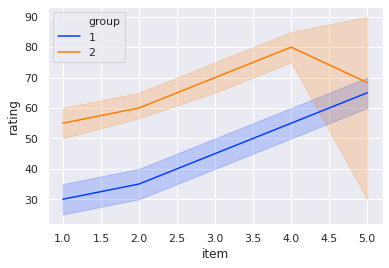

In [4]:
import pandas as pd
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from psychometrics.standard_setting import angoff_rating, contrasting_groups, iit

df = pd.read_csv('/home/cfoster/Documents/angoff_ratings.csv')
print(df)
print(angoff_rating(df))

df = pd.read_csv('/home/cfoster/Documents/iit.csv')
iit(df)
# 
df = pd.read_csv('/home/cfoster/Documents/contrasting_groups.csv')
contrasting_groups(df, score_column='scorsies')
plt.show()

Differential Item Functioning

Currently we only have the Mantel-Hanzel approach and Logistic Regression.

In [ ]:
from psychometrics.fairness import mantel_hanzel_dif, logistic_regression_dif
df = pd.read_csv('/home/cfoster/Documents/dif_CTT.csv')
result = mantel_hanzel_dif(df)
print(result)
result2 = logistic_regression_dif(df)
print(result2)

Here we are going to show off some fuzzy matching

In [ ]:
from psychometrics.nlp import short_answer_match
ratio = short_answer_match("Sarah saw batman", "Delphine saw batman")
ratio


Here is test form creation


In [ ]:
from psychometrics.test_development import test_coverage, build_parallel_forms
import pandas as pd
blueprint = {'a': 2,
             'b': 3,
             'c': 2}


actual = {'a': 3,
             'b': 2,
             'c': 2}

percentage = test_coverage(blueprint, actual)
print(percentage)

blueprint = {'a': 2,
             'b': 3,
             'c': 2,
             'd': 2,
             'e': 3,
             'f': 2,
             'g': 2,
             'h': 3,
             'j': 2,
             'k': 2}

items = pd.read_csv('/home/cfoster/Documents/form_separation.csv')
items1 = items.to_dict(orient='records')
forms = build_parallel_forms(blueprint=blueprint, items=items1,forms_to_build=2)
print(forms)


Here we will take a look at some additional item metrics
Latency and distractor analysis


In [2]:
import pandas as pd
from psychometrics.item_analysis import latency_analysis, option_analysis
df = pd.read_csv('/home/cfoster/PycharmProjects/psychometric/data/distractor_analysis.csv')

returned = latency_analysis(df)
print(returned)

options = option_analysis(data=df, distractor_correct='distractor_correct', total_score='total_score')
print(options)


item_id
1    3.041667
2    3.000000
3    3.333333
4    2.916667
5    3.041667
6    2.666667
Name: latency, dtype: float64
    item_id  distractor_id   correlation
0         1              1  6.546537e-01
1         1              2 -6.546537e-01
2         1              3  1.149190e-17
3         1              4 -6.546537e-01
4         2              1  8.783101e-01
5         2              2  4.879500e-01
6         2              3  2.070197e-01
7         2              4  6.546537e-01
8         3              1  3.927922e-01
9         3              2 -3.927922e-01
10        3              3           NaN
11        3              4 -3.927922e-01
12        4              1  4.140393e-01
13        4              2 -4.140393e-01
14        4              3 -1.309307e-01
15        4              4 -3.927922e-01
16        5              1           NaN
17        5              2           NaN
18        5              3           NaN
19        5              4           NaN
20        6      

IRT information

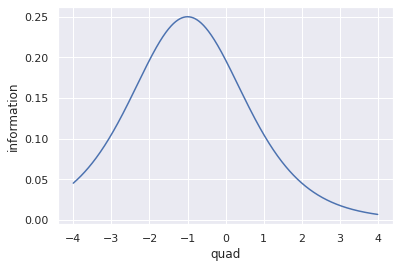

In [5]:
from psychometrics.adaptive_test import _2pl_information
info_df = _2pl_information(1, -1)
df = pd.DataFrame(info_df)

ax = sns.lineplot(x="quad", y="information", data=df)
plt.show()


Adaptive Test

In [7]:
from psychometrics.adaptive_test import multistage_adaptive 
df = pd.read_csv('/home/cfoster/PycharmProjects/psychometric/data/multistage_setup.csv')
print(df)
next_stage, next_level = multistage_adaptive(stage=1, level=1, items=df, results=[0,1,1])

item_list = [{
    'a':.5,
    'b':1.5,
    'c':.25
}, {
    'a':1,
    'b':0,
    'c':.2
}, {
    'a':1.5,
    'b':-1,
    'c':.25
}]

print(next_stage, next_level)


    item_id  a    b     c  stage  level
0         1  1 -2.5  0.25      1      1
1         2  1 -2.0  0.25      1      1
2         3  1 -1.5  0.25      1      1
3         4  1  0.0  0.25      1      2
4         5  1  1.0  0.25      1      2
5         6  1  2.0  0.25      1      2
6         7  1 -2.0  0.25      2      1
7         8  1 -2.5  0.25      2      1
8         9  1 -1.5  0.25      2      1
9        10  1  1.0  0.25      2      2
10       11  1  1.5  0.25      2      2
11       12  1  2.0  0.25      2      2
2 1


adaptive_test (not multistage)

In [11]:
from psychometrics.adaptive_test import select_next_item, L
import numpy as np
import pandas as pd

items = pd.read_csv('/home/cfoster/PycharmProjects/psychometric/data/item_params.csv')
max_prob, theta_estimate = L(np.array([ 1, 1, 1, 1, 0]), np.array([.5, .6, .7, .8, .9]),
                             np.array([-3, -2, 0, 2, 3]))


items, next_item = select_next_item(items, theta=theta_estimate, model='1PL')
print(items)
print(next_item)






    item model  params  a_param  b_param  probability  closest_prob
0      1  2PLM       2    0.549    0.093     0.042656      0.457344
1      2  2PLM       2    0.311    0.539     0.196076      0.303924
2      3  2PLM       2    0.530    0.386     0.571751      0.071751
3      4  2PLM       2    0.491   -0.047     0.879637      0.379637
4      5  2PLM       2    0.438    0.248     0.975613      0.475613
5      6  2PLM       2    0.548    0.589     0.995454      0.495454
6      7  2PLM       2    0.510    0.856     0.999166      0.499166
7      8  2PLM       2    0.390   -0.238     0.999848      0.499848
8      9  2PLM       2    0.561   -0.599     0.999972      0.499972
9     10  2PLM       2    0.471    0.489     0.999995      0.499995
10    11  2PLM       2    0.572   -0.160     0.999999      0.499999
11    12  2PLM       2    0.560    1.187     1.000000      0.500000
12    13  2PLM       2    0.659   -0.609     1.000000      0.500000
13    14  2PLM       2    0.515   -0.014     1.0